In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import metrics
import math
%matplotlib inline

## Get Dataset

In [ ]:
import tensorflow_datasets as tfds
from tensorflow.keras.datasets import mnist

In [ ]:
# (ds_train, ds_test), ds_info = tfds.load(
#     'mnist',
#     split=['train', 'test'],
#     shuffle_files=True,
#     as_supervised=True,
#     with_info=True,
# )

In [ ]:
# def normalize_img(image, label):
#   """Normalizes images: `uint8` -> `float32`."""
#   return tf.cast(image, tf.float32) / 255., label

# ds_train = ds_train.map(
#     normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
# ds_train = ds_train.cache()
# ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
# ds_train = ds_train.batch(128)
# ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [ ]:
# ds_test = ds_test.map(
#     normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
# ds_test = ds_test.batch(128)
# ds_test = ds_test.cache()
# ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

11490434/11490434 [==============================] - 0s 0us/step


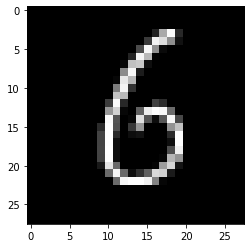

In [ ]:
plt.imshow(x_train[18], cmap = "gray")
plt.show()

In [ ]:
np.save("example_18_lbl_6.npy", x_train[18])

## Custom Loss

In [ ]:
# Might Need to implement the loss function defined in EWC
def custom_loss_fn(y_true, y_pred):
    squared_difference = tf.square(y_true - y_pred)
    return tf.reduce_mean(squared_difference, axis=-1) 

## Model 1

In [ ]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(400, activation='relu'),
  tf.keras.layers.Dense(400, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_1.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
model_1.fit(x_train, 
            y_train,
            batch_size = 32,
            epochs = 20,
            verbose = True)

## Model 2 - Range Hyperparameters

In [ ]:
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_2.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
model_2.fit(x_train, 
            y_train,
            batch_size = 32,
            epochs = 100,
            verbose = True
)

## Model 3

In [ ]:
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_3.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
model_3.fit(x_train, 
            y_train,
            batch_size = 32,
            epochs = 100,
            verbose = True
)

## Evaluation

### Select Model

In [ ]:
model = model_1

### Get Fraction Correct Score

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
print(y_pred.shape)
print(y_test.shape)

In [ ]:
print(y_pred)
print(y_test)

In [ ]:
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
np.unique(y_train, return_counts=True)

In [ ]:
!pip install torchvision

# Training Environment

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
from torchvision import datasets,transforms

## Data_loading module

In [ ]:
import numpy as np
from torchvision import datasets,transforms
from torch.utils.data import Dataset


def permutate_image_pixels(image, permutation):
    '''Permutate the pixels of an image according to [permutation].
    [image]         3D-tensor containing the image
    [permutation]   <ndarray> of pixel-indeces in their new order'''

    if permutation is None:
        return image
    else:
        c, h, w = image.size()
        image = image.view(c, -1)
        image = image[:, permutation[1]]  #--> same permutation for each channel
        image = image.view(c, h, w)
        return image

class TransformedDataset(Dataset):
    '''To modify an existing dataset with a transform.
    This is useful for creating different permutations of MNIST without loading the data multiple times.'''

    def __init__(self, original_dataset, transform=None, target_transform=None):
        super().__init__()
        self.dataset = original_dataset
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, index):
        (input, target) = self.dataset[index]
        if self.transform:
            input = self.transform(input)
        if self.target_transform:
            target = self.target_transform(target)
        return (input, target)

def permute_train_test_data(mnist_trainset, mnist_testset) :
        # get train and test datasets
        # generate pixel-permutations
        np.random.seed(10)
        permutations = [np.random.permutation(32**2) for _ in range(10)]
        # print(permutations)
        # specify transformed datasets per context
        train_datasets = []
        test_datasets = []
        for perm in enumerate(permutations):
            target_transform = None
            train_datasets.append(TransformedDataset(
                mnist_trainset, transform=transforms.Lambda(lambda x, p=perm: permutate_image_pixels(x, p)),
                target_transform=target_transform
            ))
            test_datasets.append(TransformedDataset(
                mnist_testset, transform=transforms.Lambda(lambda x, p=perm: permutate_image_pixels(x, p)),
                target_transform=target_transform
            ))

        return train_datasets, test_datasets





## Data Loading, Transformations and Permutation

In [ ]:
dataset_tranforms = transforms.Compose([
        transforms.Pad(2),
        transforms.ToTensor(),
    ]
)

In [ ]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=dataset_tranforms)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=dataset_tranforms)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
training_permutations , test_permutations = permute_train_test_data((mnist_trainset),
                                                                    (mnist_testset))

## Power Law Sampling 

In [ ]:
power_law_sampling = [57927,
44078,
33969,
26483,
20867,
16603,
13329,
10790,
8802,
7232,
5981,
4978,
4167,
3508,
2968,
2523,
2155,
1849,
1592,
1377,
1195]
MAX_TASK_EXAMPLES = 57927
MIN_TASK_EXAMPLES = 1195
NUM_TASKS = 10

In [ ]:
DOWNSAMPLE = 1
power_law_sampling[:] = [x//DOWNSAMPLE for x in power_law_sampling]
MAX_TASK_EXAMPLES//=DOWNSAMPLE
MIN_TASK_EXAMPLES//=DOWNSAMPLE

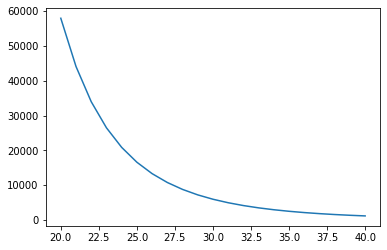

In [ ]:
plt.plot([*range(20,41,1)], power_law_sampling)

Text(0.5, 1.0, 'LOG-LOG Plot')

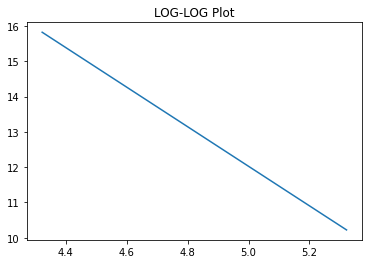

In [ ]:
plt.plot(np.log2([*range(20,41,1)]), np.log2(power_law_sampling))
plt.title("LOG-LOG Plot")

## Skip Alternate Policy

In [ ]:
freq_vector = []
for idx in range(0,20,2):
    freq_vector.append(power_law_sampling[idx])
freq_vector

[57927, 33969, 20867, 13329, 8802, 5981, 4167, 2968, 2155, 1592]

In [ ]:
phase_task_freq_count = np.zeros((NUM_TASKS,NUM_TASKS)) 
for row in range(NUM_TASKS):
    phase_task_freq_count[row,:]+=freq_vector
    freq_vector.insert(0, 0)
    freq_vector.pop()

In [ ]:
phase_task_freq_count

array([[57927., 33969., 20867., 13329.,  8802.,  5981.,  4167.,  2968.,
         2155.,  1592.],
       [    0., 57927., 33969., 20867., 13329.,  8802.,  5981.,  4167.,
         2968.,  2155.],
       [    0.,     0., 57927., 33969., 20867., 13329.,  8802.,  5981.,
         4167.,  2968.],
       [    0.,     0.,     0., 57927., 33969., 20867., 13329.,  8802.,
         5981.,  4167.],
       [    0.,     0.,     0.,     0., 57927., 33969., 20867., 13329.,
         8802.,  5981.],
       [    0.,     0.,     0.,     0.,     0., 57927., 33969., 20867.,
        13329.,  8802.],
       [    0.,     0.,     0.,     0.,     0.,     0., 57927., 33969.,
        20867., 13329.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0., 57927.,
        33969., 20867.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
        57927., 33969.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 57927.]])

In [ ]:
phase_task_freq_frac=phase_task_freq_count/np.sum(phase_task_freq_count, axis=0)
phase_task_freq_frac

array([[1.        , 0.36963761, 0.18502554, 0.10569647, 0.06525801,
        0.04242631, 0.02871328, 0.02002919, 0.0143468 , 0.01047928],
       [0.        , 0.63036239, 0.30124521, 0.165469  , 0.09879893,
        0.06248935, 0.04120811, 0.02813818, 0.01974184, 0.01419646],
       [0.        , 0.        , 0.51372925, 0.26940465, 0.15467082,
        0.09460726, 0.06069508, 0.04038274, 0.02773448, 0.01953496],
       [0.        , 0.        , 0.        , 0.45942988, 0.25182384,
        0.14810871, 0.09189077, 0.0594794 , 0.03980338, 0.02744385],
       [0.        , 0.        , 0.        , 0.        , 0.4294484 ,
        0.24113989, 0.14385602, 0.09005028, 0.05862606, 0.03938627],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.41122849, 0.23421597, 0.1409747 , 0.08875834, 0.05801171],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.39942077, 0.22952481, 0.13895216, 0.08782822],
       [0.        , 0.        , 0.       

### Creating Unified Testing Dataset for each phase

In [ ]:
from torch.utils.data import ConcatDataset
import torch

### Power Law Distirbuted Training Environment

In [ ]:
training_environments = []
np.random.seed(10)
MAX_TASK_EXAMPLES = 60000
# NUM_PHASES = NUM_TASKS
for phase in range(NUM_TASKS): 
    phase_training = []
    for task in range(NUM_TASKS):
        num_ele_to_pick = phase_task_freq_count[task,phase]
        selected_indices = np.random.choice([*range(int(MAX_TASK_EXAMPLES)+1)], int(num_ele_to_pick), replace=False)
        task_subset = torch.utils.data.Subset(training_permutations[task], selected_indices)
        phase_training.append(task_subset)
    final_phase_dataset = ConcatDataset(phase_training)
    training_environments.append(final_phase_dataset)


10
Training environment size for task  1 is : 9654
Training environment size for task  2 is : 15315
Training environment size for task  3 is : 18792
Training environment size for task  4 is : 21013
Training environment size for task  5 is : 22480
Training environment size for task  6 is : 23476
Training environment size for task  7 is : 24170
Training environment size for task  8 is : 24664
Training environment size for task  9 is : 25023
Training environment size for task  10 is : 25288


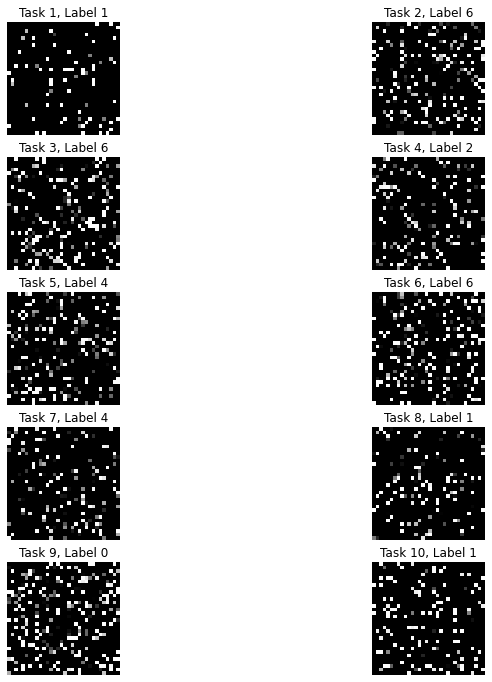

In [ ]:
print(len(training_environments))
figure = plt.figure(figsize=(12, 12))
cols, rows = 2, 5
for i in range(1,NUM_TASKS+1):
  print("Training environment size for task ", i , "is :", len(training_environments[i-1]))
  img, label = training_permutations[i-1][(len(training_environments[i-1])-1)]
  figure.add_subplot(rows, cols, i)
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title("Task " +str(i) + ", Label " + str(label))
plt.show()

### SGD (Lower Baseline) Training Environment

In [ ]:
SGD_training_environments = []
np.random.seed(10)
MAX_TASK_EXAMPLES = 60000
# NUM_PHASES = NUM_TASKS
num_ele_to_pick = phase_task_freq_count[0,0] # to select only new task uniformly 
for phase in range(NUM_TASKS): 
    phase_training = []
    selected_indices = np.random.choice([*range(int(MAX_TASK_EXAMPLES)+1)], int(num_ele_to_pick), replace=False)
    new_task = phase # only new task for each phase
    task_subset = torch.utils.data.Subset(training_permutations[new_task], selected_indices)
    phase_training.append(task_subset)
    final_phase_dataset = ConcatDataset(phase_training)
    SGD_training_environments.append(final_phase_dataset)

10
Training environment size for task  1 is : 9654
Training environment size for task  2 is : 9654
Training environment size for task  3 is : 9654
Training environment size for task  4 is : 9654
Training environment size for task  5 is : 9654
Training environment size for task  6 is : 9654
Training environment size for task  7 is : 9654
Training environment size for task  8 is : 9654
Training environment size for task  9 is : 9654
Training environment size for task  10 is : 9654


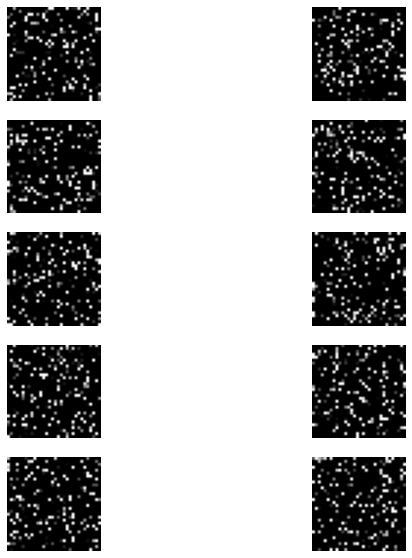

In [ ]:
print(len(SGD_training_environments))
figure = plt.figure(figsize=(10, 10))
cols, rows = 2, 5
for i in range(1,NUM_TASKS+1):
  print("Training environment size for task ", i , "is :", len(SGD_training_environments[i-1]))
  img, label = training_permutations[i-1][0]
  figure.add_subplot(rows, cols, i)
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Upper Baseline Training Environment

In [ ]:
UBL_training_environments = []
np.random.seed(10)
MAX_TASK_EXAMPLES = 60000
num_ele_to_pick = phase_task_freq_count[0,0]
# NUM_PHASES = NUM_TASKS
for phase in range(1): # only 1 phase is enough for upper baseline
    phase_training = []
    for task in range(NUM_TASKS):
        selected_indices = np.random.choice([*range(int(MAX_TASK_EXAMPLES)+1)], int(num_ele_to_pick), replace=False)
        task_subset = torch.utils.data.Subset(training_permutations[task], selected_indices)
        phase_training.append(task_subset)
    final_phase_dataset = ConcatDataset(phase_training)
    UBL_training_environments.append(final_phase_dataset)


In [ ]:
print(len(UBL_training_environments))
figure = plt.figure(figsize=(10, 10))
cols, rows = 2, 5
for i in range(len(UBL_training_environments)):
  print("Training environment size for task ", i , "is :", len(UBL_training_environments[i-1]))
#   img, label = training_permutations[i-1][0]
#   figure.add_subplot(rows, cols, i)
#   plt.axis("off")
#   plt.imshow(img.squeeze(), cmap="gray")
# plt.show()

1
Training environment size for task  0 is : 96540


<Figure size 720x720 with 0 Axes>

In [ ]:
from torch.utils.data import ConcatDataset
import torch

def get_all_training_environments():
  dataset_tranforms = transforms.Compose([
          transforms.Pad(2),
          transforms.ToTensor(),
      ]
  )


  # In[7]:


  mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=dataset_tranforms)
  mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=dataset_tranforms)


  # In[8]:


  training_permutations , test_permutations = permute_train_test_data((mnist_trainset),
                                                                      (mnist_testset))


  # ## Power Law Sampling 

  # In[9]:


  power_law_sampling = [57927,
  44078,
  33969,
  26483,
  20867,
  16603,
  13329,
  10790,
  8802,
  7232,
  5981,
  4978,
  4167,
  3508,
  2968,
  2523,
  2155,
  1849,
  1592,
  1377,
  1195]
  MAX_TASK_EXAMPLES = 57927
  MIN_TASK_EXAMPLES = 1195
  NUM_TASKS = 10

  DOWNSAMPLE = 6
  power_law_sampling[:] = [x//DOWNSAMPLE for x in power_law_sampling]
  MAX_TASK_EXAMPLES//=DOWNSAMPLE
  MIN_TASK_EXAMPLES//=DOWNSAMPLE


  # ## Skip Alternate Policy

  # In[12]:


  freq_vector = []
  for idx in range(0,20,2):
      freq_vector.append(power_law_sampling[idx])
  freq_vector


  # In[13]:


  phase_task_freq_count = np.zeros((NUM_TASKS,NUM_TASKS)) 
  for row in range(NUM_TASKS):
      phase_task_freq_count[row,:]+=freq_vector
      freq_vector.insert(0, 0)
      freq_vector.pop()


  # In[14]:


  phase_task_freq_count


  # In[15]:


  phase_task_freq_frac=phase_task_freq_count/np.sum(phase_task_freq_count, axis=0)
  phase_task_freq_frac


  # ### Creating Unified Testing Dataset for each phase

  # In[16]:



  # ### Power Law Distirbuted Training Environment

  # In[17]:


  training_environments = []
  np.random.seed(10)
  MAX_TASK_EXAMPLES = 60000
  # NUM_PHASES = NUM_TASKS
  for phase in range(NUM_TASKS): 
      phase_training = []
      for task in range(NUM_TASKS):
          num_ele_to_pick = phase_task_freq_count[task,phase]
          selected_indices = np.random.choice([*range(int(MAX_TASK_EXAMPLES)+1)], int(num_ele_to_pick), replace=False)
          task_subset = torch.utils.data.Subset(training_permutations[task], selected_indices)
          phase_training.append(task_subset)
      final_phase_dataset = ConcatDataset(phase_training)
      training_environments.append(final_phase_dataset)


  # In[18]:


  print(len(training_environments))
  for i in range(1,NUM_TASKS+1):
    print("Training environment size for task ", i , "is :", len(training_environments[i-1]))


  # ### SGD (Lower Baseline) Training Environment

  # In[25]:


  SGD_training_environments = []
  np.random.seed(10)
  MAX_TASK_EXAMPLES = 60000
  # NUM_PHASES = NUM_TASKS
  num_ele_to_pick = phase_task_freq_count[0,0] # to select only new task uniformly 
  for phase in range(NUM_TASKS): 
      phase_training = []
      selected_indices = np.random.choice([*range(int(MAX_TASK_EXAMPLES)+1)], int(num_ele_to_pick), replace=False)
      new_task = phase # only new task for each phase
      task_subset = torch.utils.data.Subset(training_permutations[new_task], selected_indices)
      phase_training.append(task_subset)
      final_phase_dataset = ConcatDataset(phase_training)
      SGD_training_environments.append(final_phase_dataset)


  # In[26]:


  print(len(SGD_training_environments))
  for i in range(1,NUM_TASKS+1):
    print("Training environment size for task ", i , "is :", len(SGD_training_environments[i-1]))


  # ### Upper Baseline Training Environment

  # In[27]:


  UBL_training_environments = []
  np.random.seed(10)
  MAX_TASK_EXAMPLES = 60000
  num_ele_to_pick = phase_task_freq_count[0,0]
  # NUM_PHASES = NUM_TASKS
  for phase in range(1): # only 1 phase is enough for upper baseline
      phase_training = []
      for task in range(NUM_TASKS):
          selected_indices = np.random.choice([*range(int(MAX_TASK_EXAMPLES)+1)], int(num_ele_to_pick), replace=False)
          task_subset = torch.utils.data.Subset(training_permutations[task], selected_indices)
          phase_training.append(task_subset)
      final_phase_dataset = ConcatDataset(phase_training)
      UBL_training_environments.append(final_phase_dataset)


  # In[32]:


  print(len(UBL_training_environments))
  for i in range(len(UBL_training_environments)):
    print("Training environment size for task ", i , "is :", len(UBL_training_environments[i-1]))

  return training_environments, SGD_training_environments, UBL_training_environments

In [ ]:
get_all_training_environments()

10
Training environment size for task  1 is : 9654
Training environment size for task  2 is : 15315
Training environment size for task  3 is : 18792
Training environment size for task  4 is : 21013
Training environment size for task  5 is : 22480
Training environment size for task  6 is : 23476
Training environment size for task  7 is : 24170
Training environment size for task  8 is : 24664
Training environment size for task  9 is : 25023
Training environment size for task  10 is : 25288
10
Training environment size for task  1 is : 9654
Training environment size for task  2 is : 9654
Training environment size for task  3 is : 9654
Training environment size for task  4 is : 9654
Training environment size for task  5 is : 9654
Training environment size for task  6 is : 9654
Training environment size for task  7 is : 9654
Training environment size for task  8 is : 9654
Training environment size for task  9 is : 9654
Training environment size for task  10 is : 9654
1
Training environment 

([<torch.utils.data.dataset.ConcatDataset at 0x7ffa14519410>,
 [<torch.utils.data.dataset.ConcatDataset at 0x7ffa14540b90>])

# CIFAR

Files already downloaded and verified
Files already downloaded and verified
[array([1006,  307,  487, ...,  996,  125,  265]), array([   8,   36,  417, ...,   91,  938, 1007]), array([577, 379, 751, ..., 799,  93, 835]), array([426, 316, 615, ..., 186, 836, 869]), array([ 454,   30,  450, ..., 1002,  187,  296]), array([848, 156,   7, ..., 264, 510, 321]), array([399, 821, 334, ..., 737, 711, 540]), array([425, 147, 527, ..., 899, 637, 894]), array([966, 207, 943, ..., 806,  50, 792]), array([199, 843, 463, ...,  21, 343, 729])]
10
Training environment size for task  1 is : 44078
Training environment size for task  2 is : 70561
Training environment size for task  3 is : 87164
Training environment size for task  4 is : 97954
Training environment size for task  5 is : 105186
Training environment size for task  6 is : 110164
Training environment size for task  7 is : 113672
Training environment size for task  8 is : 116195
Training environment size for task  9 is : 118044
Training environ

<ipython-input-24-2f823a8f803b>:265: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3277.)
  plt.imshow(img.T.squeeze())


IndexError: ignored

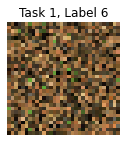

In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

%matplotlib inline


from torchvision import datasets,transforms


# ## Data_loading module

# In[5]:


import numpy as np
from torchvision import datasets,transforms
from torch.utils.data import Dataset


def permutate_image_pixels(image, permutation):
    '''Permutate the pixels of an image according to [permutation].
    [image]         3D-tensor containing the image
    [permutation]   <ndarray> of pixel-indeces in their new order'''

    if permutation is None:
        return image
    else:
        c, h, w = image.size()
        image = image.view(c, -1)
        image = image[:, permutation[1]]  #--> same permutation for each channel
        image = image.view(c, h, w)
        return image

class TransformedDataset(Dataset):
    '''To modify an existing dataset with a transform.
    This is useful for creating different permutations of MNIST without loading the data multiple times.'''

    def __init__(self, original_dataset, transform=None, target_transform=None):
        super().__init__()
        self.dataset = original_dataset
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, index):
        (input, target) = self.dataset[index]
        if self.transform:
            input = self.transform(input)
        if self.target_transform:
            target = self.target_transform(target)
        return (input, target)

def permute_train_test_data(mnist_trainset, mnist_testset) :
        # get train and test datasets
        # generate pixel-permutations
        np.random.seed(10)
        permutations = [np.random.permutation(32**2) for _ in range(10)]
        print(permutations)
        # specify transformed datasets per context
        train_datasets = []
        test_datasets = []
        for perm in enumerate(permutations):
            target_transform = None
            train_datasets.append(TransformedDataset(
                mnist_trainset, transform=transforms.Lambda(lambda x, p=perm: permutate_image_pixels(x, p)),
                target_transform=target_transform
            ))
            test_datasets.append(TransformedDataset(
                mnist_testset, transform=transforms.Lambda(lambda x, p=perm: permutate_image_pixels(x, p)),
                target_transform=target_transform
            ))

        return train_datasets, test_datasets


from torch.utils.data import ConcatDataset
import torch

def get_all_training_environments():
  dataset_tranforms = transforms.Compose([
          # transforms.Pad(2),
          transforms.ToTensor(),
      ]
  )


  # In[7]:


  cifar10_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=dataset_tranforms)
  cifar10_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=dataset_tranforms)

  # In[8]:


  training_permutations , test_permutations = permute_train_test_data((cifar10_trainset),
                                                                      (cifar10_testset))


  # ## Power Law Sampling 

  # In[9]:


  power_law_sampling = [57927,
  44078,
  33969,
  26483,
  20867,
  16603,
  13329,
  10790,
  8802,
  7232,
  5981,
  4978,
  4167,
  3508,
  2968,
  2523,
  2155,
  1849,
  1592,
  1377,
  1195]
  MAX_TASK_EXAMPLES = 44078
  MIN_TASK_EXAMPLES = 1195
  NUM_TASKS = 10

  DOWNSAMPLE = 1
  power_law_sampling[:] = [x//DOWNSAMPLE for x in power_law_sampling]
  MAX_TASK_EXAMPLES//=DOWNSAMPLE
  MIN_TASK_EXAMPLES//=DOWNSAMPLE


  # ## Skip Alternate Policy

  # In[12]:


  freq_vector = []
  for idx in range(1,20,2):
      freq_vector.append(power_law_sampling[idx])
  freq_vector


  # In[13]:


  phase_task_freq_count = np.zeros((NUM_TASKS,NUM_TASKS)) 
  for row in range(NUM_TASKS):
      phase_task_freq_count[row,:]+=freq_vector
      freq_vector.insert(0, 0)
      freq_vector.pop()


  # In[14]:


  phase_task_freq_count


  # In[15]:


  phase_task_freq_frac=phase_task_freq_count/np.sum(phase_task_freq_count, axis=0)
  phase_task_freq_frac


  # ### Creating Unified Testing Dataset for each phase

  # In[16]:



  # ### Power Law Distirbuted Training Environment

  # In[17]:


  training_environments = []
  np.random.seed(10)
  MAX_TASK_EXAMPLES = 44078
  # NUM_PHASES = NUM_TASKS
  for phase in range(NUM_TASKS): 
      phase_training = []
      for task in range(NUM_TASKS):
          num_ele_to_pick = phase_task_freq_count[task,phase]
          selected_indices = np.random.choice(np.arange(MAX_TASK_EXAMPLES), int(num_ele_to_pick), replace=False)
          task_subset = torch.utils.data.Subset(training_permutations[task], selected_indices)
          phase_training.append(task_subset)
      final_phase_dataset = ConcatDataset(phase_training)
      training_environments.append(final_phase_dataset)


  # In[18]:


  print(len(training_environments))
  for i in range(1,NUM_TASKS+1):
    print("Training environment size for task ", i , "is :", len(training_environments[i-1]))


  # ### SGD (Lower Baseline) Training Environment

  # In[25]:
  SGD_training_environments = []
  num_ele_to_pick = phase_task_freq_count[0,0]
  for i in range(NUM_TASKS):
    selected_indices = np.random.choice(np.arange(MAX_TASK_EXAMPLES), int(num_ele_to_pick), replace=False)
    task_subset = torch.utils.data.Subset(training_permutations[i], selected_indices)
    SGD_training_environments.append(task_subset)


  # In[26]:


  print(len(SGD_training_environments))
  for i in range(1,NUM_TASKS+1):
    print("Training environment size for task ", i , "is :", len(SGD_training_environments[i-1]))


  # ### Upper Baseline Training Environment

  # In[27]:


  UBL_training_environments = []
  np.random.seed(10)
  MAX_TASK_EXAMPLES = 60000
  num_ele_to_pick = phase_task_freq_count[0,0]
  # NUM_PHASES = NUM_TASKS
  phase_training = []
  for phase in range(NUM_TASKS): # only 1 phase is enough for upper baseline
        selected_indices = np.random.choice(np.arange(MAX_TASK_EXAMPLES), int(num_ele_to_pick), replace=False)
        task_subset = torch.utils.data.Subset(training_permutations[phase], selected_indices)
        phase_training.append(task_subset)
        final_phase_dataset = ConcatDataset(phase_training)
        UBL_training_environments.append(final_phase_dataset)



  print(len(UBL_training_environments))
  for i in range(1,len(UBL_training_environments)+1):
    print("Training environment size for task ", i , "is :", len(UBL_training_environments[i-1]))

  print(len(training_environments))
  figure = plt.figure(figsize=(12, 12))
  cols, rows = 2, 5
  for i in range(1,NUM_TASKS+1):
    print("Training environment size for task ", i , "is :", len(training_environments[i-1]))
    img, label = training_permutations[i-1][(len(training_environments[i-1])-1)]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.T.squeeze())
    plt.title("Task " +str(i) + ", Label " + str(label))
  plt.show()

  return training_environments, SGD_training_environments, UBL_training_environments, test_permutations

training_environments_cifar, _, _ ,_ = get_all_training_environments()

# Distribution

0.5819048852379487


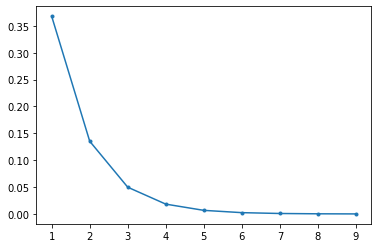

In [12]:
beta = 1
x = np.arange(1,10)
y = np.exp(-x/beta)/beta
print(np.sum(y))
plt.plot(x,y,marker='.')

5.000041976610661


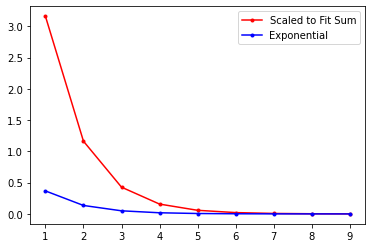

In [13]:
print(np.sum(y*(5/0.5819)))
plt.plot(x,y*(5/0.5819),marker='.', c="red", label="Scaled to Fit Sum")
plt.plot(x,y,marker='.', c="blue",label="Exponential")
plt.legend()

7.666500000000001


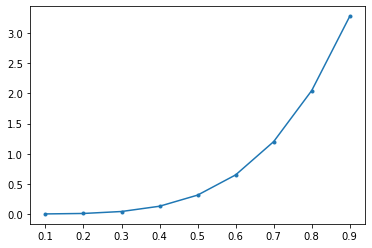

In [14]:
alpha = 5
x = np.arange(0.1,1, 0.1)
y = alpha*np.power(x, alpha - 1)
print(np.sum(y))
plt.plot(x,y,marker='.')

5.0


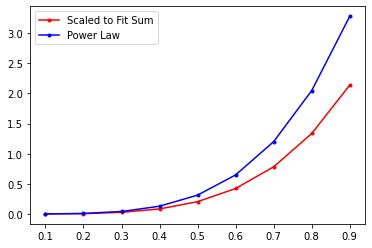

In [15]:
print(np.sum(y*(5/7.6665)))
plt.plot(x,y*(5/7.6665),marker='.', c="red", label="Scaled to Fit Sum")
plt.plot(x,y,marker='.', c="blue", label="Power Law")
plt.legend()

In [193]:
def get_phase_task_frequency_matrix(new_task_cnt, 
                                    replay_fraction,
                                    replay_distribution,
                                    min_example,
                                    phase_cnt,
                                    hyperparameters):
  if replay_fraction <= 0 or replay_fraction > 1:
    print("Invalid replay fraction: "+str(replay_fraction))
    return None
  replay_cnt = math.floor(new_task_cnt*replay_fraction) 
  phase_task_frequency_matrix = np.diag(np.repeat(new_task_cnt, phase_cnt))
  if replay_distribution == "uniform":
    for i in range(1, phase_cnt):
      task_freq = replay_cnt//i
      for j in range(i):
        phase_task_frequency_matrix[j,i]+=task_freq
    return phase_task_frequency_matrix
  elif replay_distribution == "powerlaw":
    if "alpha" not in hyperparameters.keys():
      print("Missing Hyperparameter: alpha")
      return None
    alpha = hyperparameters["alpha"]
    if alpha <= 2:
      print("Invalid Hyperparameter: alpha")
      return None
    not_enough_replay_count = False
    for i in range(1, phase_cnt):
      sample_positions = np.arange(10, 10 + (i)) # Hyperparameterizable for sampling?
      sample_positions=0.01*sample_positions
      sample_points = alpha*np.power(sample_positions, alpha - 1)
      sample_sum = np.sum(sample_points)
      rescaled_samples = (replay_cnt//sample_sum)*sample_points
      # print("column: "+str(i))
      # print(np.sum(rescaled_samples))
      # print((sample_points))
      # print((rescaled_samples))
      for j in range(i):
        phase_task_frequency_matrix[j,i]+=rescaled_samples[j]
        if rescaled_samples[i-j-1] < min_example:
          not_enough_replay_count = True
    if not_enough_replay_count:
      print("WARNING: Replay data set size not enough to ensure existence of all previous tasks.")
    return phase_task_frequency_matrix
  elif replay_distribution == "exponential":
    if "beta" not in hyperparameters.keys():
      print("Missing Hyperparameter: beta")
      return None
    beta = hyperparameters["beta"]
    if beta <= 0:
      print("Invalid Hyperparameter: beta")
      return None
    not_enough_replay_count = False
    for i in range(1, phase_cnt):
      sample_positions = np.arange(1,i+1) # Hyperparameterizable for sampling?
      sample_points = np.exp(-sample_positions/beta)/beta
      sample_sum = np.sum(sample_points)
      rescaled_samples = (replay_cnt//sample_sum)*sample_points
      for j in range(i):
        phase_task_frequency_matrix[j,i]+=rescaled_samples[i-j-1]
        if rescaled_samples[i-j-1] < min_example:
          not_enough_replay_count = True
    if not_enough_replay_count:
      print("WARNING: Replay data set size not enough to ensure existence of all previous tasks.")
    return phase_task_frequency_matrix
  else:
    print("Invalid Distribution")
    return None
  
  return phase_task_frequency_matrix

In [199]:
get_phase_task_frequency_matrix(1000, 0.5, "powerlaw", 1, 5, {"alpha": 5, "beta": 1})

array([[1000,  499,  202,  110,   67],
       [   0, 1000,  297,  161,   99],
       [   0,    0, 1000,  228,  140],
       [   0,    0,    0, 1000,  193],
       [   0,    0,    0,    0, 1000]])

0.108864


Text(0.5, 1.0, 'PowerLaw')

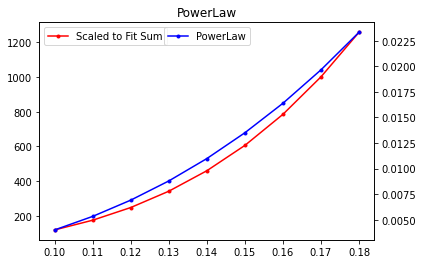

In [191]:
alpha = 4
x = np.arange(10, 10 + 10 - 1)
x = 0.01*x
y = alpha*np.power(x, alpha - 1)
print(np.sum(y))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
y = [119,175,248,342,460,606,785,1001,1258]

ax1.plot(x, y,marker='.', c="red", label="Scaled to Fit Sum")
ax2.plot(x, alpha*np.power(x, alpha - 1),marker='.', c="blue",label="PowerLaw")
ax1.legend()
ax2.legend(loc="upper center")
plt.title("PowerLaw")

0.21407084399626886


Text(0.5, 1.0, 'Exponential')

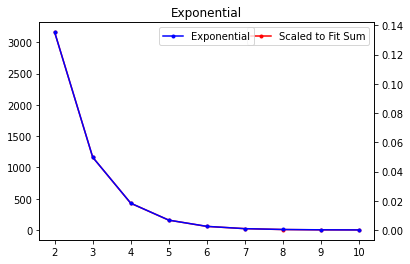

In [192]:
beta = 1
x = np.arange(2,11)
y = np.exp(-x/beta)/beta
print(np.sum(y))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
y = [1,2,7,21,57,157,427,1162,3160]
y.reverse()
ax1.plot(x, y,marker='.', c="red", label="Scaled to Fit Sum")
ax2.plot(x, np.exp(-x),marker='.', c="blue",label="Exponential")
ax1.legend()
ax2.legend(loc="upper center")
plt.title("Exponential")

0.5819048852379487


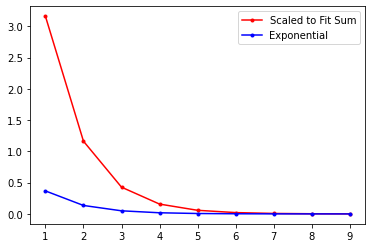

In [91]:
beta = 1
x = np.arange(1,10)
y = np.exp(-x/beta)/beta
print(np.sum(y))
plt.plot(x,[1,2,7,21,57,157,427,1162,3160,5000],marker='.', c="red", label="Scaled to Fit Sum")
plt.plot(x,[],marker='.', c="blue",label="Exponential")
plt.legend()

In [110]:
lst = [1,2,7,21,57,157,427,1162,3160,5000]
lst.reverse()
lst

[5000, 3160, 1162, 427, 157, 57, 21, 7, 2, 1]